In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time
from tensorflow import keras

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

2022-08-10 22:09:23.769990: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-10 22:09:23.770013: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


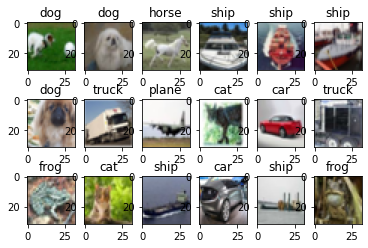

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]
num_samples=50000
# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, num_samples)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

(Text(0.5, 0, 'Class ID'), Text(0, 0.5, 'counts'))

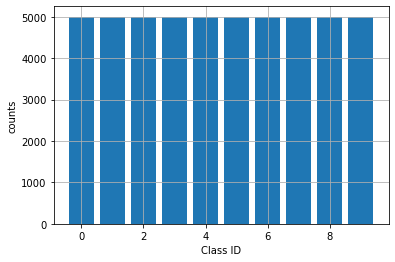

In [3]:
centers = np.arange(0, num_classes + 1)
counts, bounds = np.histogram(y_train)

plt.bar(centers[:-1], counts), plt.grid(True)
plt.xlabel('Class ID'), plt.ylabel('counts')

In [4]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [10]:
inputs = Input(shape=(size, size, 3))

net = Conv2D(98, kernel_size=(11, 11), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(3, 3))(net)
net = Conv2D(256, kernel_size=(5, 5), activation="relu")(net)
net = MaxPooling2D(pool_size=(3, 3))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 64)        12352     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0   

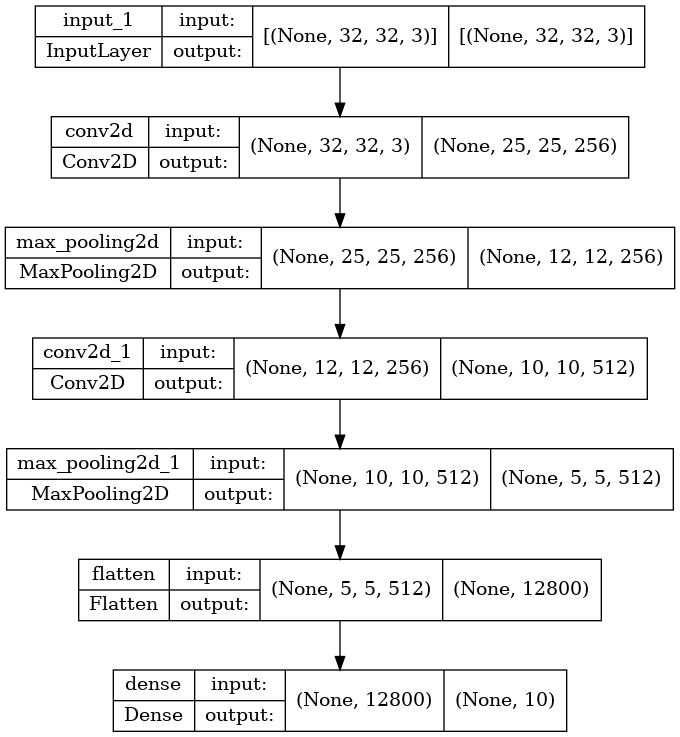

In [6]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [11]:
epochs = 35
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/35


2022-08-10 22:34:12.952758: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 552960000 exceeds 10% of free system memory.


352/352 [==============================] - 28s 80ms/step - loss: 1.6813 - accuracy: 0.3934 - val_loss: 1.4967 - val_accuracy: 0.4720
Epoch 2/35
352/352 [==============================] - 28s 79ms/step - loss: 1.3943 - accuracy: 0.5059 - val_loss: 1.3311 - val_accuracy: 0.5280
Epoch 3/35
352/352 [==============================] - 28s 79ms/step - loss: 1.2704 - accuracy: 0.5515 - val_loss: 1.2436 - val_accuracy: 0.5494
Epoch 4/35
352/352 [==============================] - 28s 78ms/step - loss: 1.1783 - accuracy: 0.5847 - val_loss: 1.1970 - val_accuracy: 0.5814
Epoch 5/35
352/352 [==============================] - 28s 79ms/step - loss: 1.1166 - accuracy: 0.6105 - val_loss: 1.1144 - val_accuracy: 0.6158
Epoch 6/35
352/352 [==============================] - 28s 79ms/step - loss: 1.0579 - accuracy: 0.6306 - val_loss: 1.1254 - val_accuracy: 0.6158
Epoch 7/35
352/352 [==============================] - 28s 79ms/step - loss: 1.0093 - accuracy: 0.6486 - val_loss: 1.0569 - val_accuracy: 0.6306
Epo

In [16]:
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

True [3 8 8 0 6]
Pred [5 1 8 0 4]
Pred [[4.5876924e-02 3.5560544e-05 8.9296870e-02 3.5966861e-01 5.0116516e-05
  4.9726605e-01 2.3823217e-03 1.8445689e-06 5.3834543e-03 3.8214836e-05]
 [9.0584962e-04 9.8992717e-01 5.4905154e-06 2.0717815e-08 2.8686462e-09
  3.2522748e-10 6.9962883e-11 3.3744721e-10 8.7322074e-04 8.2882978e-03]
 [2.8993141e-02 4.9290735e-02 5.7762442e-04 3.2742568e-03 5.5974437e-04
  2.5062030e-04 2.8530536e-05 2.4994381e-02 5.2775311e-01 3.6427790e-01]
 [5.7246631e-01 6.0041230e-03 1.6347645e-03 2.8049058e-04 1.6690443e-05
  3.2051815e-08 1.1568720e-05 4.4191961e-06 4.1958088e-01 5.9856904e-07]
 [1.7208107e-08 1.7573682e-06 3.3858820e-04 2.0377509e-02 9.3991894e-01
  2.6247191e-04 3.9089315e-02 9.4159068e-06 1.7285097e-06 2.7608166e-07]]
(10000, 10)


In [17]:
classids = range(0, 10)
y_pred = np.argmax(y_pred, axis=1)

for classid in classids:
    mask = y_true == classid
    
    tp = np.sum(y_pred[mask] == classid)
    total = np.sum(mask)
    
    print('ClassID-', classid, ' acc', tp/total)
    
print('y_true', y_true[mask])
print('y_pred', y_pred[mask])

ClassID- 0  acc 0.643
ClassID- 1  acc 0.705
ClassID- 2  acc 0.561
ClassID- 3  acc 0.572
ClassID- 4  acc 0.535
ClassID- 5  acc 0.51
ClassID- 6  acc 0.678
ClassID- 7  acc 0.718
ClassID- 8  acc 0.835
ClassID- 9  acc 0.786
y_true [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9

In [18]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.3367 - accuracy: 0.6543
Test loss   1.3366661071777344
Test metric 0.6542999744415283


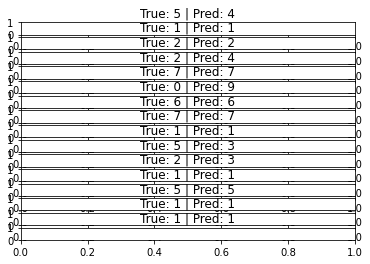

In [19]:
for ii in range(15):
    idx = np.random.randint(0, len(y_pred))
    plt.subplot(15,1,ii+1), #plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(y_true[idx]) + ' | Pred: ' + str(y_pred[idx]))